In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("Data_Sampanis.xlsx",parse_dates=["Datetime UTC"])
df.shape

(55319, 9)

In [3]:
df.head()

,Unnamed: 0,Datetime UTC,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures
0,0,2016-12-31 22:00:00+00:00,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541
1,1,2016-12-31 23:00:00+00:00,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541
2,2,2017-01-01 00:00:00+00:00,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541
3,3,2017-01-01 01:00:00+00:00,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541
4,4,2017-01-01 02:00:00+00:00,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541


In [4]:
# Sort DataFrame in date order
df.sort_values(by=["Datetime UTC"], inplace=True, ascending=True)
df.head()

,Unnamed: 0,Datetime UTC,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures
0,0,2016-12-31 22:00:00+00:00,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541
1,1,2016-12-31 23:00:00+00:00,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541
2,2,2017-01-01 00:00:00+00:00,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541
3,3,2017-01-01 01:00:00+00:00,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541
4,4,2017-01-01 02:00:00+00:00,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541


In [5]:
df.dropna(inplace=True)
df.columns

Index(['Unnamed: 0', 'Datetime UTC', 'Datetime EET(UTC+2/UTC+3)',
       'Wind Generation Forecast', 'Solar Generation Forcast', 'Load Forcast',
       'Day-Ahead Price', 'Carbon Futures', 'Dutch TTF NG Futures'],
      dtype='object')

In [6]:
# Add datetime parameters for Datetime UTC
df["Year"] = df["Datetime UTC"].dt.year
df["Month"] = df["Datetime UTC"].dt.month
df["Day"] = df["Datetime UTC"].dt.day
df["Dayofweek"] = df["Datetime UTC"].dt.dayofweek
df["Dayofyear"] = df["Datetime UTC"].dt.dayofyear
df["Hour"]=df["Datetime UTC"].dt.hour
# Drop original date
df.drop("Datetime UTC", axis=1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,Datetime EET(UTC+2/UTC+3),Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Day-Ahead Price,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour
0,0,2017-01-01T00:00UTC+02,500.0,0.0,6243,51.10,6.54,19.541,2016,12,31,5,366,22
1,1,2017-01-01T01:00UTC+02,480.0,0.0,5793,49.41,6.54,19.541,2016,12,31,5,366,23
2,2,2017-01-01T02:00UTC+02,470.0,0.0,5623,49.42,6.54,19.541,2017,1,1,6,1,0
3,3,2017-01-01T03:00UTC+02,450.0,0.0,5294,49.45,6.54,19.541,2017,1,1,6,1,1
4,4,2017-01-01T04:00UTC+02,450.0,0.0,5042,48.97,6.54,19.541,2017,1,1,6,1,2


In [8]:
# Function to return a dataframe of all spikes in a specific year
def results(year):
    # Get all electricity prices
    prices=df[df["Year"]==year]["Day-Ahead Price"].copy()
    prices.sort_values(ascending=True,inplace=True)
    prices=prices.reset_index()
    neg_thres=prices.loc[int(len(prices)*0.05)][1]
    pos_thres=prices.loc[int(len(prices)*0.95)][1]
    df1=df[df["Year"]==year].copy()
    df1neg=df1[df1["Day-Ahead Price"]<neg_thres]
    df1pos=df1[df1["Day-Ahead Price"]>pos_thres]
    df1=pd.concat([df1neg,df1pos])
    return df1

In [9]:
df2017=results(2017)
df2018=results(2018)
df2019=results(2019)
df2020=results(2020)

In [10]:
dfspikes=pd.concat([df2017,df2018,df2019,df2020])

In [11]:
len(dfspikes)

3323

### Split the data into X & y

In [12]:
X=dfspikes.drop(["Day-Ahead Price","Unnamed: 0","Datetime EET(UTC+2/UTC+3)"],axis=1)
y=dfspikes["Day-Ahead Price"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [14]:
X_train.head()

,Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour
868,700.0,0.0,4222,5.43,21.942,2017,2,6,0,37,2
1275,460.0,0.0,4696,5.70,18.302,2017,2,23,3,54,1
1276,460.0,0.0,4615,5.70,18.302,2017,2,23,3,54,2
1277,460.0,0.0,4725,5.70,18.302,2017,2,23,3,54,3
1299,730.0,0.0,4686,5.73,17.798,2017,2,24,4,55,1


In [15]:
X_test.head()

,Wind Generation Forecast,Solar Generation Forcast,Load Forcast,Carbon Futures,Dutch TTF NG Futures,Year,Month,Day,Dayofweek,Dayofyear,Hour
28741,1250.0,1762.0,4842,21.86,7.279,2020,4,12,6,103,11
28742,1230.0,1532.0,4553,21.86,7.279,2020,4,12,6,103,12
28743,1170.0,1179.0,4460,21.86,7.279,2020,4,12,6,103,13
28744,1070.0,762.0,4424,21.86,7.279,2020,4,12,6,103,14
28753,350.0,0.0,3824,21.86,7.279,2020,4,12,6,103,23


In [16]:
# Create evaluation function  
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_test, y_test)}
    return scores

## Bayesian

In [17]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
model = GridSearchCV(estimator=BayesianRidge(), param_grid = bay_params, cv = 3, n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_init': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
                         'lambda_init': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09]})

In [18]:
model.best_params_

{'alpha_init': 1.9, 'lambda_init': 0.1}

In [19]:
show_scores(model)

{'Training MAE': 12.217626351303222,
 'Valid MAE': 17.774931323166257,
 'Training R^2': 0.7941525269753484,
 'Valid R^2': 0.6449394822760632}

## Fit the model with the best params

In [20]:
ideal_model = BayesianRidge(alpha_init=1.9,lambda_init=0.1) 
ideal_model.fit(X_train, y_train)

BayesianRidge(alpha_init=1.9, lambda_init=0.1)

In [21]:
ideal_model.predict(X_test)

array([ 4.72327992,  3.26114468,  6.90571928, 12.763918  , 22.31523625,
       25.37907074, 25.14316909, 26.50318252, 31.55785857, 26.8834223 ,
       25.07790517, 25.19948319, 29.1482743 , 21.00869712, 17.70629489,
       16.34990363, 17.57749975, 15.60406231, 14.63963704, 13.60820453,
       17.00326736, 10.49736461,  8.95937532,  8.60345505, 10.44850149,
       16.60996277, 16.06957386, 13.93940812, 14.20729859, 16.32905311,
       13.52285172, 15.06631965, 12.86209506,  7.20034074,  7.71423467,
        9.19003313, 20.41063491, 17.53504201, 21.37168381, 22.34338369,
       17.89792286, 15.00747332, 13.01842362, 13.06338333, 16.82531484,
       21.7156511 , 15.13181853,  9.17454928,  7.17043139,  5.48684599,
        4.87524224,  6.27685048,  8.45909118, 15.48103229, 14.7707846 ,
        6.81802097,  4.81889513,  3.77949941,  5.41560837,  9.87265651,
        7.71809507,  5.87043945,  7.25125028, 15.68280913, 25.83472025,
       24.30977149, 20.03530706, 18.85602434, 18.53767302, 18.93

In [22]:
y_test

28741     0.00
28742     0.00
28743     0.20
28744    12.90
28753    18.60
         ...  
34865    90.59
34866    89.49
34867    89.89
34868    95.03
34869    89.79
Name: Day-Ahead Price, Length: 665, dtype: float64

In [23]:
show_scores(ideal_model)

{'Training MAE': 12.217626351303222,
 'Valid MAE': 17.774931323166257,
 'Training R^2': 0.7941525269753484,
 'Valid R^2': 0.6449394822760632}

In [51]:
predictions=ideal_model.predict(X_test)
len(predictions)

665

In [52]:
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(predictions,y_test))))

RMSE: 24.18832979262186


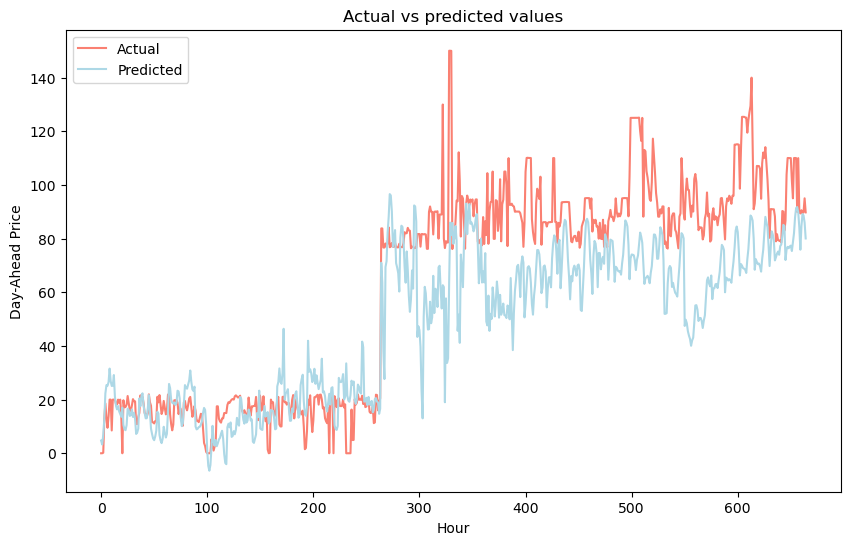

In [25]:
hours=[x for x in range(0,665)]
plt.figure(figsize=(10,6))
plt.plot(hours,y_test[:665],c="salmon");
plt.plot(hours,predictions[:665],c="lightblue")
plt.title("Actual vs predicted values")
plt.xlabel("Hour")
plt.legend(["Actual","Predicted"])
plt.ylabel("Day-Ahead Price");

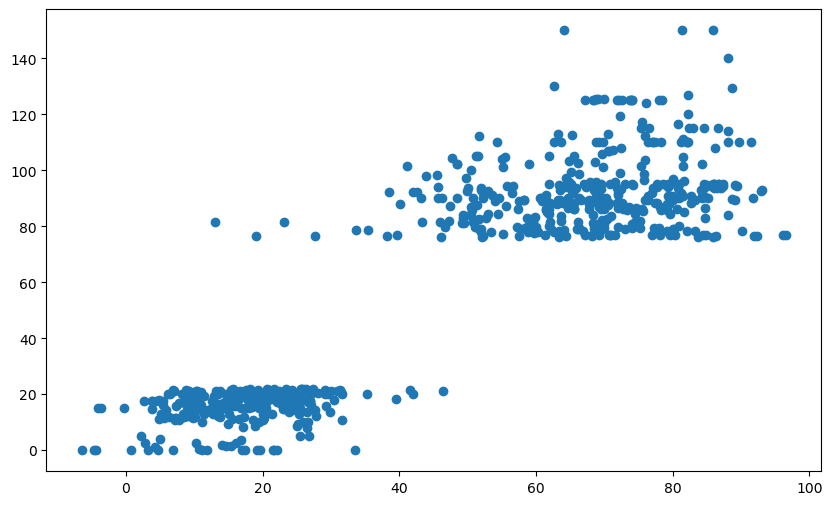

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(predictions,y_test)

## Random Forest Regressor

In [27]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"],  
           "max_samples": [2127]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 13.8 s
Wall time: 14.6 s


C:\Users\anast\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anast\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anast\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\anast\Desktop\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py", line 408, i

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [2127],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [28]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_samples': 2127,
 'max_features': 1.0,
 'max_depth': 3}

In [29]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 10.081155555873577,
 'Valid MAE': 21.800702908871607,
 'Training R^2': 0.8150185088337925,
 'Valid R^2': 0.5165482483790163}

In [55]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [31]:
show_scores(ideal_model)

{'Training MAE': 3.9254780506143323,
 'Valid MAE': 17.126887075393164,
 'Training R^2': 0.9666129165641719,
 'Valid R^2': 0.6239299883676019}

In [56]:
predictions=ideal_model.predict(X_test)
len(predictions)

665

In [57]:
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(predictions,y_test))))

RMSE: 24.006698815861697


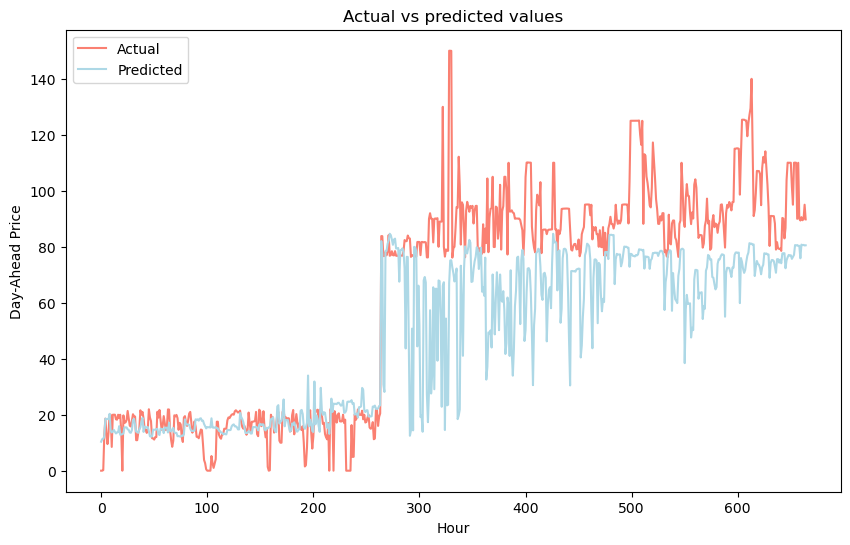

In [33]:
hours=[x for x in range(0,665)]
plt.figure(figsize=(10,6))
plt.plot(hours,y_test[:665],c="salmon");
plt.plot(hours,predictions[:665],c="lightblue")
plt.title("Actual vs predicted values")
plt.xlabel("Hour")
plt.legend(["Actual","Predicted"])
plt.ylabel("Day-Ahead Price");

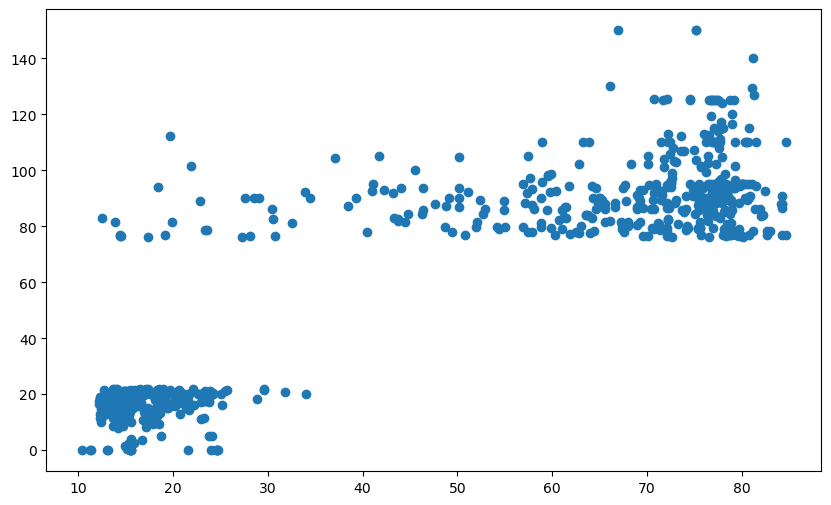

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(predictions,y_test)

## Transformer

In [35]:
X_train_sequence=X_train.values.tolist()

In [36]:
X_train.shape

(2658, 11)

In [37]:
y_train_sequence=y_train.values.tolist()

In [38]:
for i in range (len(X_train_sequence)):
    for j in range(11):
        X_train_sequence[i][j]=[X_train_sequence[i][j]]

In [39]:
X_train_sequence1=np.array(X_train_sequence)
y_train_sequence1=np.array(y_train_sequence)

### Create the transformer encoder

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

### Function to build the model

In [41]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [42]:
input_shape=X_train_sequence1.shape[1:]
model=build_model(input_shape,head_size=256,num_heads=4,ff_dim=8,num_transformer_blocks=2,mlp_units=[128],mlp_dropout=0.4,dropout=0.25)
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-4))
callbacks=[keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)]
model.fit(X_train_sequence1,y_train_sequence1,validation_split=0.2,epochs=200,batch_size=64,callbacks=callbacks)


Epoch 1/200
34/34 [==============================] - 9s 119ms/step - loss: 273926.9375 - val_loss: 13351.3750
Epoch 2/200
34/34 [==============================] - 3s 101ms/step - loss: 264398.8125 - val_loss: 11479.9453
Epoch 3/200
34/34 [==============================] - 3s 98ms/step - loss: 234993.6250 - val_loss: 10179.9082
Epoch 4/200
34/34 [==============================] - 3s 99ms/step - loss: 237503.2188 - val_loss: 10839.6709
Epoch 5/200
34/34 [==============================] - 5s 135ms/step - loss: 221002.5469 - val_loss: 6871.1089
Epoch 6/200
34/34 [==============================] - 11s 344ms/step - loss: 190043.3438 - val_loss: 6096.3521
Epoch 7/200
34/34 [==============================] - 7s 207ms/step - loss: 189579.2500 - val_loss: 6308.0918
Epoch 8/200
34/34 [==============================] - 4s 117ms/step - loss: 166789.6250 - val_loss: 6791.5264
Epoch 9/200
34/34 [==============================] - 5s 138ms/step - loss: 157791.5000 - val_loss: 4735.2505
Epoch 10/200
34/

In [43]:
model.save('my_model.keras')

In [44]:
X_test_sequence=X_test.values.tolist()
y_test_sequence=y_test.values.tolist()
X_test_sequence1=np.array(X_test_sequence)
y_test_sequence1=np.array(y_test_sequence)

In [45]:
predictions=model.predict(X_test_sequence1)

21/21 [==============================] - 1s 17ms/step


In [46]:
import tensorflow as tf
from sklearn import metrics
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(predictions,y_test_sequence1))))

RMSE: 31.86050258440475


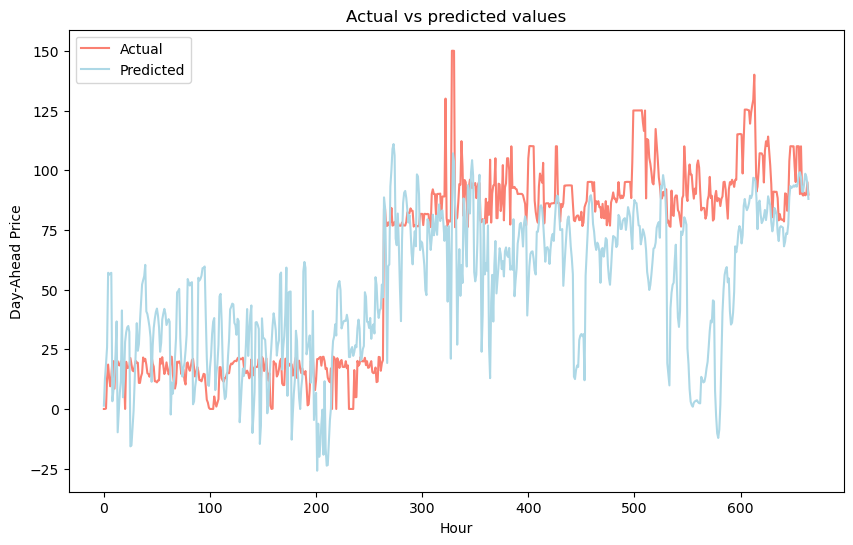

In [47]:
hours=[x for x in range(0,665)]
plt.figure(figsize=(10,6))
plt.plot(hours,y_test[:665],c="salmon");
plt.plot(hours,predictions[:665],c="lightblue")
plt.title("Actual vs predicted values")
plt.xlabel("Hour")
plt.legend(["Actual","Predicted"])
plt.ylabel("Day-Ahead Price");

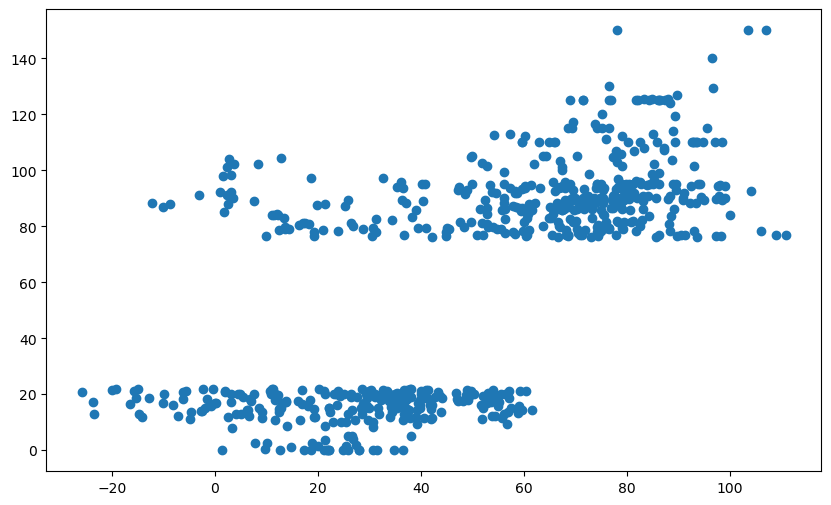

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(predictions,y_test)

In [49]:
mean_absolute_error(y_test, predictions)

25.268336167376965